In [4]:
#this package calls the yahoo finance api to download the daily stock prices.
!pip install yfinance

import yfinance as yf


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [6]:
#initilaizing a ticker class, which will enable us to download price history for a single symbol, here gspc ofcourse is for 
# s&p500
sp500=yf.Ticker("^GSPC")

In [7]:
#getting all the histroical data
sp500= sp500.history(period="max")




In [8]:
#ps: only trading days are included in this data.
sp500.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-08 00:00:00-04:00,5663.600098,5720.100098,5635.379883,5663.939941,5627400000,0.0,0.0
2025-05-09 00:00:00-04:00,5679.649902,5691.689941,5644.149902,5659.910156,4645090000,0.0,0.0
2025-05-12 00:00:00-04:00,5807.200195,5845.370117,5786.080078,5844.189941,6014580000,0.0,0.0
2025-05-13 00:00:00-04:00,5854.149902,5906.640137,5845.020020,5886.549805,5516290000,0.0,0.0
2025-05-14 00:00:00-04:00,5896.740234,5906.549805,5880.750000,5889.709961,428213007,0.0,0.0


In [9]:
sp500.index


DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-05-01 00:00:00-04:00', '2025-05-02 00:00:00-04:00',
               '2025-05-05 00:00:00-04:00', '2025-05-06 00:00:00-04:00',
               '2025-05-07 00:00:00-04:00', '2025-05-08 00:00:00-04:00',
               '2025-05-09 00:00:00-04:00', '2025-05-12 00:00:00-04:00',
               '2025-05-13 00:00:00-04:00', '2025-05-14 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24458, freq=None)

# cleaning and visualizing the stock market data:

<Axes: xlabel='Date'>

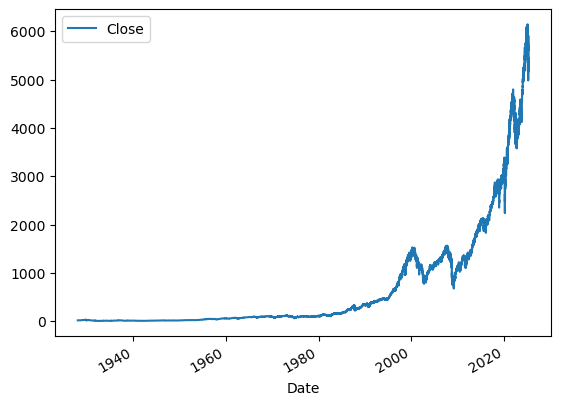

In [10]:
#plotting the data in the dataframe, closing price against the index, which is the date in our case:
sp500.plot.line(y="Close",use_index=True)


In [11]:
# removing the dividends and the stock splits columns,  they are more useful for indiviaul stocks and not
# indexes so much:
del sp500["Dividends"]
del sp500["Stock Splits"]

sp500


,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2025-05-08 00:00:00-04:00,5663.600098,5720.100098,5635.379883,5663.939941,5627400000
2025-05-09 00:00:00-04:00,5679.649902,5691.689941,5644.149902,5659.910156,4645090000
2025-05-12 00:00:00-04:00,5807.200195,5845.370117,5786.080078,5844.189941,6014580000


# setting up our target for machine learning:
 - basically what we will be predicting using ml: which is if the stock price will go up or down.
 - some poeple like predicitng the absolute price, but the porblem with that is the model might be very very accurate, but in the stock market we dont really care about the absoulte price, but about the directionality, so more like should i buy it and will it go up.
 - we can be very right about the price but very far behind on predicitng if it will go up and down.

## we will focus on looking at days that the stock went up and seeing if we can predict that the stock will go up. so our target is if the stock will go up or down.

In [12]:
#basically we took the close column and shifted all the price back one day.
sp500['Tomorrow']=sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-05-08 00:00:00-04:00,5663.600098,5720.100098,5635.379883,5663.939941,5627400000,5659.910156
2025-05-09 00:00:00-04:00,5679.649902,5691.689941,5644.149902,5659.910156,4645090000,5844.189941
2025-05-12 00:00:00-04:00,5807.200195,5845.370117,5786.080078,5844.189941,6014580000,5886.549805


In [13]:
# our target: is tomorrow's price greater than today's price, but as an int so that we can use it in ML.
sp500["Target"]=(sp500["Tomorrow"]> sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-05-08 00:00:00-04:00,5663.600098,5720.100098,5635.379883,5663.939941,5627400000,5659.910156,0
2025-05-09 00:00:00-04:00,5679.649902,5691.689941,5644.149902,5659.910156,4645090000,5844.189941,1
2025-05-12 00:00:00-04:00,5807.200195,5845.370117,5786.080078,5844.189941,6014580000,5886.549805,1


we have too many historic data, now noramlly the more the historic data the better, but with stock marktet data if you go too far, the martket could have shifted a lot and a lot of that data is not useful in making predictions. so we will remove data before 1990.

In [14]:
sp500=sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-05-08 00:00:00-04:00,5663.600098,5720.100098,5635.379883,5663.939941,5627400000,5659.910156,0
2025-05-09 00:00:00-04:00,5679.649902,5691.689941,5644.149902,5659.910156,4645090000,5844.189941,1
2025-05-12 00:00:00-04:00,5807.200195,5845.370117,5786.080078,5844.189941,6014580000,5886.549805,1


# Training an initial machine learning model:
# using randomforestclassfier as our default machine learning model, for the following reasons:-
1. Random forests work by training a bunch of individual decision trees with randomized parameters and then averaging  the results, due to which they are resistant to overfitting.
2. run relatively quickly.
3. cna pick up non linear tendency in data. for example the open price is not lineraly corelated to the target. if the open price is higher it does not mean that the target will be higher too. Rndom forests can pick up such non linear relationships. ps: if you can find any linear relationships, you can make a lot of money.



In [16]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
# the parameters:
#n_estimators: the number of decision trees you want to train. The higher it is, the better the accuracy  up to a limit.
#min_samples_fit: helps us protect us against overfitting. The higher we set it, the less accurate but less it will overfit.
#random_state: means that if we  run the same model twice, the random numbers that we generate will be in a predictable sequence.
# which basically means if we run the model twice, we get the same result.

#splitting in train and test: taking into account the fact that we  have time series data:
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]

#the columns we want to use as predictors: we have to be careful and make sure we don't feed the model any 
# information about the future.
predictors=["Close", "Volume", "High","Low", "Open"]

model.fit(train[predictors], train["Target"])




RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
# measuring how accurate the model is:
from sklearn.metrics import precision_score
# basically did it predict the market going up right and what percentage of the time did it predict it going up

preds=model.predict(test[predictors])
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
import pandas as pd
preds=pd.Series(preds,index=test.index)

In [19]:
preds

Date
2024-12-18 00:00:00-05:00    1
2024-12-19 00:00:00-05:00    1
2024-12-20 00:00:00-05:00    1
2024-12-23 00:00:00-05:00    1
2024-12-24 00:00:00-05:00    1
                            ..
2025-05-08 00:00:00-04:00    1
2025-05-09 00:00:00-04:00    1
2025-05-12 00:00:00-04:00    1
2025-05-13 00:00:00-04:00    1
2025-05-14 00:00:00-04:00    1
Length: 100, dtype: int64

In [20]:
from sklearn.metrics import precision_score

In [21]:
precision_score(test["Target"],preds)


0.5747126436781609

In [ ]:
# thats not great, so we need to make the model better.

In [22]:
combined=pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

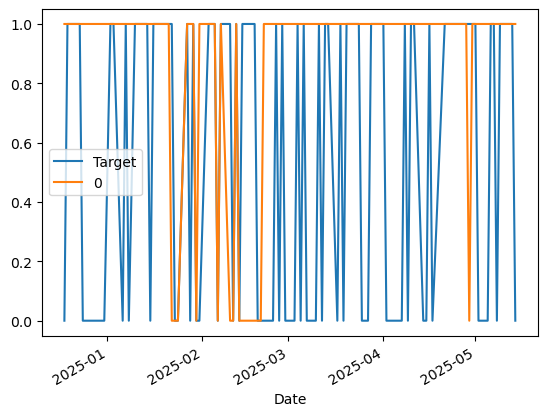

In [23]:
combined.plot()

In [ ]:
# well we can see how our predictions were so wrong.

 # Building a backtesting system:


In [24]:
def predict(train,test,predictors, model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index, name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined
    

In [25]:
#backtesting function:
def backtest(data, model, predictors, start=2500,step=250):
    all_predictions=[]
    for i in range(start, data.shape[0],step):
        train=data.iloc[:-i].copy()
        test=data.iloc[-i:i+step].copy()
        if len(test)==0:
            continue
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
        

  

 start is  basically when we backtest a model we want to have a certain about of data. since each trading
 year has about 250 days, it is saying take 10 years of data.

step: we will be training the model for about a year and then going into the next year and next  year.
      basically taking 10 years of data and predicting  values for the 11th year. then take 11 years and        predict the 12th year and so on.

In [26]:
predictors=["Close", "Volume", "High", "Low", "Open"]
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
predictions=backtest(sp500, model, predictors)

In [27]:
predictions["Predictions"].value_counts()

Predictions
0    67208
1    15356
Name: count, dtype: int64

In [28]:
# looking at out precision score:
precision_score(predictions["Target"], predictions["Predictions"])

0.5329512893982808

# Adding additional predictors to our model:
- see if that improves our accuracy. we will  create a variety of rolling averages.
- if we are a normal analyst tryin to predict if the stock market will go up , we might wanna look at if the price today is higher than it was last week or then it was 3 months or a year ago and use that to determine if the stock will go up and down. we are going to give the algorithm all that information.

In [31]:
# we will calculate the mena close price in the last 2 days, the last trading week which is 5 day and so on
# we will also calculate the ratio  between todays closing price and closing price in that period which will tell
# us know is the market gone up a tone, which means the market may be heading towards a downa and vice-versa

horizons=[2,5,60,250,1000]
new_predictors=[]

for horizon in horizons:
    rolling_average=sp500.rolling(horizon).mean()
    ratio_column= f"Close_ratio_{horizon}"
    sp500[ratio_column]= sp500["Close"]/rolling_average["Close"]
    
    trend_column=f"Trend_{horizon}"
    sp500[trend_column]= sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]



    


In [32]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-08 00:00:00-04:00,5663.600098,5720.100098,5635.379883,5663.939941,5627400000,5659.910156,0,1.002892,2.0,1.002851,3.0,1.004354,32.0,0.996877,145.0,1.210156,529.0
2025-05-09 00:00:00-04:00,5679.649902,5691.689941,5644.149902,5659.910156,4645090000,5844.189941,1,0.999644,1.0,1.003088,2.0,1.004804,32.0,0.995855,144.0,1.208909,529.0
2025-05-12 00:00:00-04:00,5807.200195,5845.370117,5786.080078,5844.189941,6014580000,5886.549805,1,1.016019,1.0,1.028681,3.0,1.038351,32.0,1.027830,144.0,1.247812,530.0


In [34]:
# the nan values, are basically when pandas cannot find enough days to count the rolling avergae it fills
# it with NaNs. getting rid of them kinds:

sp500=sp500.dropna()
sp500



,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-07 00:00:00-04:00,5614.180176,5654.729980,5578.640137,5631.279785,4987440000,5663.939941,1,1.002168,1.0,0.999184,3.0,0.997370,32.0,0.991461,144.0,1.203561,529.0
2025-05-08 00:00:00-04:00,5663.600098,5720.100098,5635.379883,5663.939941,5627400000,5659.910156,0,1.002892,2.0,1.002851,3.0,1.004354,32.0,0.996877,145.0,1.210156,529.0
2025-05-09 00:00:00-04:00,5679.649902,5691.689941,5644.149902,5659.910156,4645090000,5844.189941,1,0.999644,1.0,1.003088,2.0,1.004804,32.0,0.995855,144.0,1.208909,529.0


# Improving our model:-




In [36]:
model= RandomForestClassifier(n_estimators=200,min_samples_split=50, random_state=1)

In [37]:
# we want a little bit more control then just 1 and 0 in our prediction, so we use the predict_proba, which
# will return a probabilty that a row will be 0 or 1:
def predict(train,test,predictors, model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6]=1
    preds[preds<.6]=0
    preds=pd.Series(preds,index=test.index, name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined
    

In [38]:
predictions=backtest(sp500, model,new_predictors)

In [39]:
predictions["Predictions"].value_counts()

Predictions
0.0    41636
1.0    23759
Name: count, dtype: int64

In [ ]:
# the value up count has increased from 15356 to 23759. the  distribution seems  very diffrent now.

In [40]:
# counting the precision:
precision_score(predictions["Target"],predictions["Predictions"])

0.5398375352498

In [ ]:
# it improves a little bit, but still not very good but we are just looking at historical data.

# final predictions and visualizations:

In [44]:
# training on the full  data to make predictions:
model.fit(sp500[predictors],sp500["Target"])

# predict  next day trend:
latest_data=sp500.iloc[-1:][predictors]
pred_next_day=model.predict(latest_data)[0]


print("Prediction for next trading day:", "📈 Up" if pred_next_day == 1 else "📉 Down")

Prediction for next trading day: 📈 Up
